<a href="https://colab.research.google.com/github/hernanescorp/DP_700_Hernan_Escriba/blob/main/Sintaxis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SINTAXIS NOTEBOOK FOR DATA ANALIST ENGINEER**

In [ ]:
person = []
person_info = []

## **SELECT, COUNT, FILTER, ORDER**

***Example1***
Person is a DataFrame

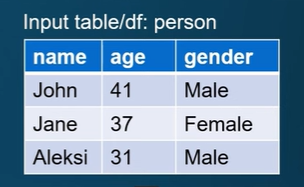
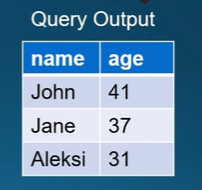

**SQL**

In [ ]:
%%sql
SELECT name, age
FROM person

**KQL**



```
  person
  | project name, age
```



**PySpark**

In [ ]:
display(person.select("name","age"))

***Example 2:***

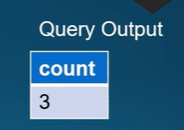

**SQL**

In [ ]:
%%sql
SELECT COUNT(*) AS COUNT
FROM person;

**KQL**



```
person
|count
```



**PySpark**

In [ ]:
display(person\
        .agg({"*":"count"})\
        .withColumnRnamed("count(1)","count"))

***Example 3***

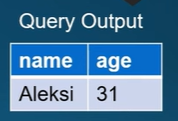

**SQL**

In [ ]:
%%sql
SELECT name, age
FROM person
WHERE name = 'Aleksi'


**KQL**



```
person
| where name == "Aleksi"
| project name, age
```



**PySpark**

In [ ]:
display(person \
        .filter(person["name"]=="Aleksi")\
        .select("name","age"))


***Example 4***

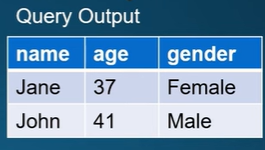

**SQL**

In [ ]:
%%sql
SELECT *
FROM person
WHERE age >=37
ORDER BY age ASC;

**KQL**



```
person
| where age >=37
| project name, age, gender
| order by age asc
```



**PySpark**

In [ ]:
display(person\
        .filter(person["age"]>=37)\
        .select("name", "age", "gender")\
        .orderBy("age", ascending=True))

## **JOINS**

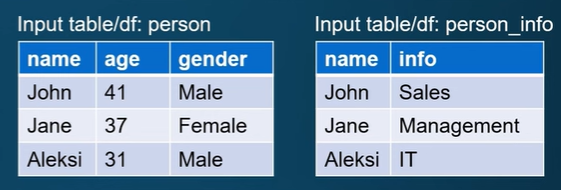

Output:

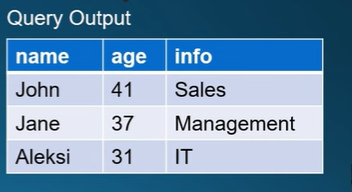

**SQL**

In [ ]:
%%sql
SELECT p.name, p.age, pi.info
FROM person AS p
JOIN person_info AS pi
ON p.name = pi.name;

**KQL**



```
person
| join person_info on name
| project name, age, info
```



**PySpark**

In [ ]:
display(person\
        .JOIN(person_info, person["name"]==person_info["name"])\
        .select(person["name"], person["age"], person_info["info"]))

## **WORKING WITH A DATAWAREHOUSE**

Create a Warehouse in Fabric and Run the next setup sql query

In [ ]:
%%sql
-- Create a schema
CREATE SCHEMA dp700_e004;
GO

-- Create the employees table
CREATE TABLE dp700_e004.employees (
    employee_id INT,
    name VARCHAR(50),
    department_id INT,
    hire_date DATE,
    salary DECIMAL(10, 2)
);
GO

-- Insert data into employees table
INSERT INTO dp700_e004.employees (employee_id, name, department_id, hire_date, salary)
VALUES
    (1, 'John Doe', 101, '2015-06-01', 75000.00),
    (2, 'Jane Smith', 102, '2018-09-15', 85000.00),
    (3, 'Alex Johnson', 103, '2020-01-10', 68000.00),
    (4, 'Sara Lee', 101, '2017-03-12', 72000.00),
    (5, 'Michael Brown', 102, '2019-11-20', 95000.00),
    (6, 'Emma Davis', 103, '2021-07-18', 62000.00);
GO

-- Create the departments table
CREATE TABLE dp700_e004.departments (
    department_id INT,
    department_name VARCHAR(50),
    manager VARCHAR(50),
    location VARCHAR(50)
);
GO

-- Insert data into departments table
INSERT INTO dp700_e004.departments (department_id, department_name, manager, location)
VALUES
    (101, 'Sales', 'Alice Green', 'New York'),
    (102, 'Management', 'Robert White', 'San Francisco'),
    (103, 'IT', 'Sophia Black', 'Seattle'),
    (104, 'Marketing', 'David Blue', 'Chicago');
GO

-- Create the projects table
CREATE TABLE dp700_e004.projects (
    project_id INT,
    project_name VARCHAR(50),
    department_id INT,
    budget DECIMAL(12, 2),
    start_date DATE
);
GO

-- Insert data into projects table
INSERT INTO dp700_e004.projects (project_id, project_name, department_id, budget, start_date)
VALUES
    (201, 'Product Launch', 101, 150000.00, '2023-01-01'),
    (202, 'System Upgrade', 103, 200000.00, '2022-05-15'),
    (203, 'New Branch Setup', 102, 250000.00, '2023-03-01'),
    (204, 'Digital Marketing Campaign', 104, 120000.00, '2022-08-01');
GO

-- Create the assignments table to track employee-project relationships
CREATE TABLE dp700_e004.assignments (
    assignment_id INT,
    employee_id INT,
    project_id INT,
    assigned_date DATE,
    role VARCHAR(50)
);
GO

-- Insert data into assignments table
INSERT INTO dp700_e004.assignments (assignment_id, employee_id, project_id, assigned_date, role)
VALUES
    (1, 1, 201, '2023-02-01', 'Team Lead'),
    (2, 3, 202, '2022-06-01', 'Developer'),
    (3, 2, 203, '2023-04-01', 'Project Manager'),
    (4, 5, 203, '2023-04-15', 'Analyst'),
    (5, 4, 201, '2023-02-10', 'Sales Rep'),
    (6, 6, 202, '2022-07-01', 'Support Engineer');
GO

The last sql query creates 4 tables and inserts rows.

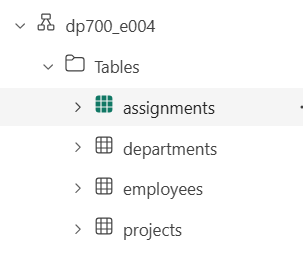

To query and SELECT all columns:
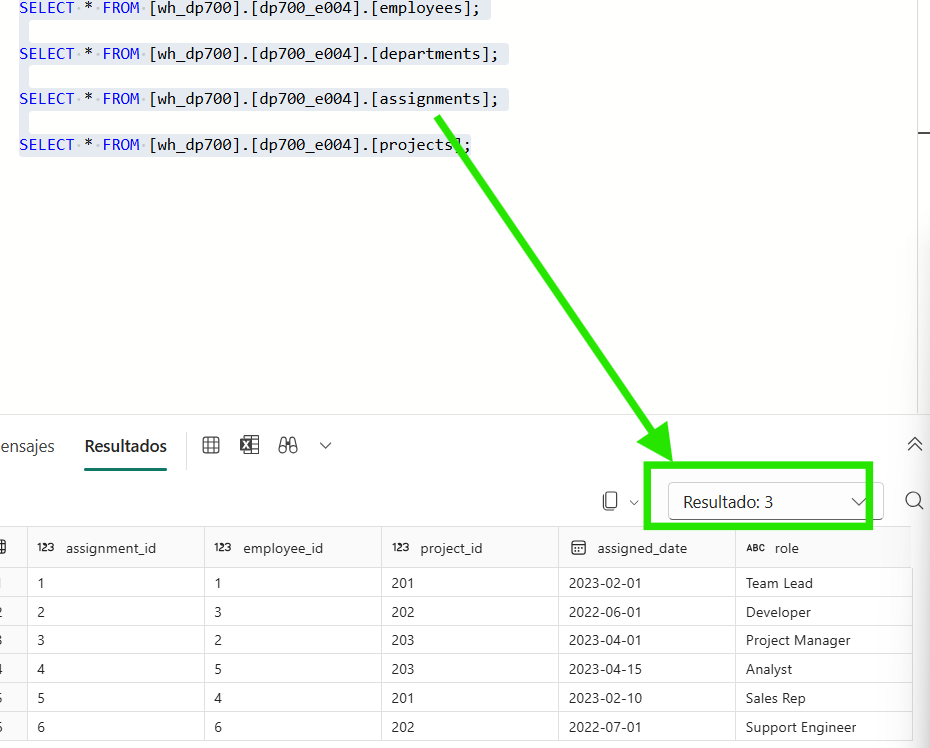

In [ ]:
%%sql
SELECT * FROM [wh_dp700].[dp700_e004].[employees];

SELECT * FROM [wh_dp700].[dp700_e004].[departments];

SELECT * FROM [wh_dp700].[dp700_e004].[assignments];

SELECT * FROM [wh_dp700].[dp700_e004].[projects];

Now lets filter and concat string from employees table:

In [ ]:
%%sql
SELECT name,
salary,
concat('$', salary) AS salary_string
FROM [dp700_e004].[employees]
WHERE salary >=75000;


Lets check the result:

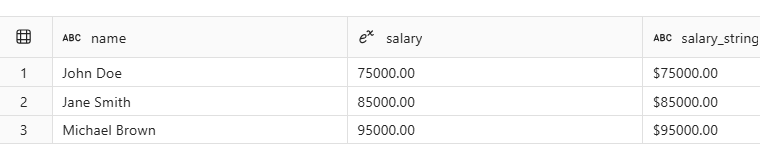

**JOIN**

Now we want column name from employees table and department_name from departments table

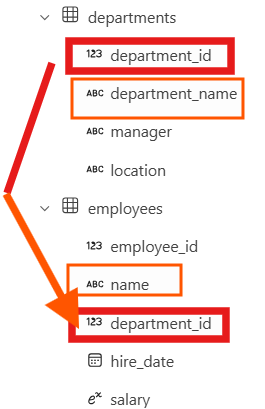

In [ ]:
%%sql
SELECT e.name,
e.department_id,
d.department_name
FROM dp700_e004.employees AS e
LEFT JOIN dp700_e004.departments AS d
ON e.department_id = d.department_id

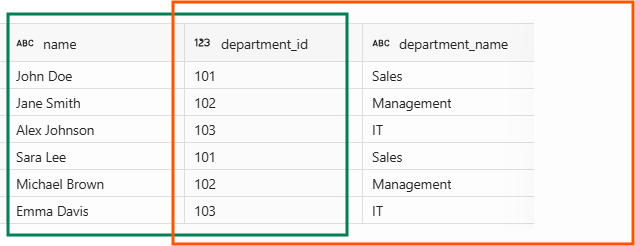

**SUBQUERIES, COUNT AND JOIN**

In order to get the number of employees of each department lets query the next script:

In [ ]:
%%sql
SELECT
a.department_name,
COUNT(*) as number_of_employees
FROM(
    SELECT e.name,
    e.department_id,
    d.department_name
    FROM [wh_dp700].[dp700_e004].[employees] AS e
    LEFT JOIN [wh_dp700].[dp700_e004].[departments] AS d
    ON e.department_id = d.department_id
    ) as a
GROUP BY department_name

Output:
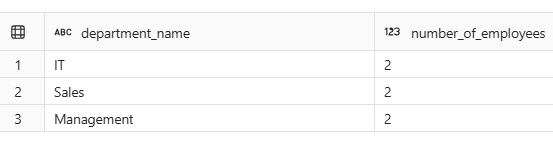


##**Working with KQL**

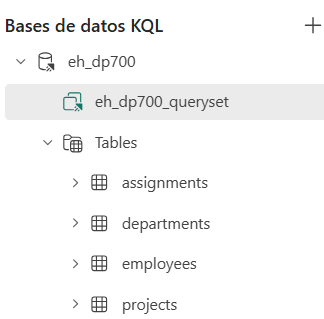

To select all columns of a table just write its name:

```
assignments

departments

employees

projects
```
To filter and choose columns:
```
employees
| where salary >=75000
| project name, salary_string = strcat("$ ", salary)
```
output:

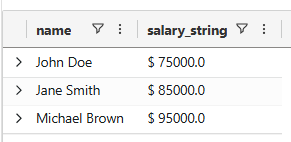

To join and know in which department works each employee:

```
employees
| join kind=leftouter departments on department_id
| project name, department_id, department_name
```
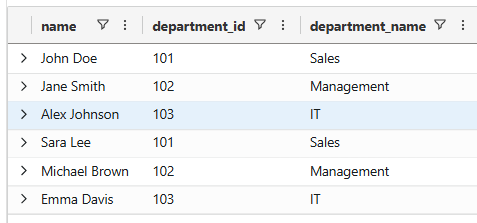

To count How many workers work in each department:
```
employees
| join kind=leftouter departments on department_id
| summarize number_of_employees = count() by department_name
```
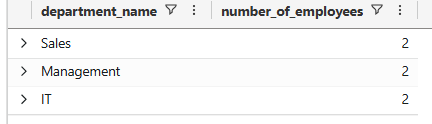

##**WORKING WITH PYSPARK**

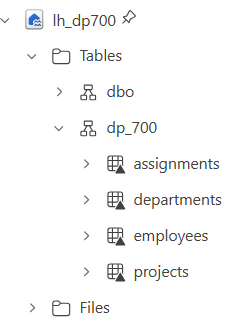

Lets get the data in the delta tables to Dataframes using spark.sql:

In [ ]:
assignments = spark.sql("SELECT * FROM lh_dp700.dp_700.assignments")
departments = spark.sql("SELECT * FROM lh_dp700.dp_700.departments")
employees = spark.sql("SELECT * FROM lh_dp700.dp_700.employees")
projects = spark.sql("SELECT * FROM lh_dp700.dp_700.projects")


To visualize data of the DataFrames:

In [ ]:
display(assigments)
display(departments)
display(employees)
display(projects)


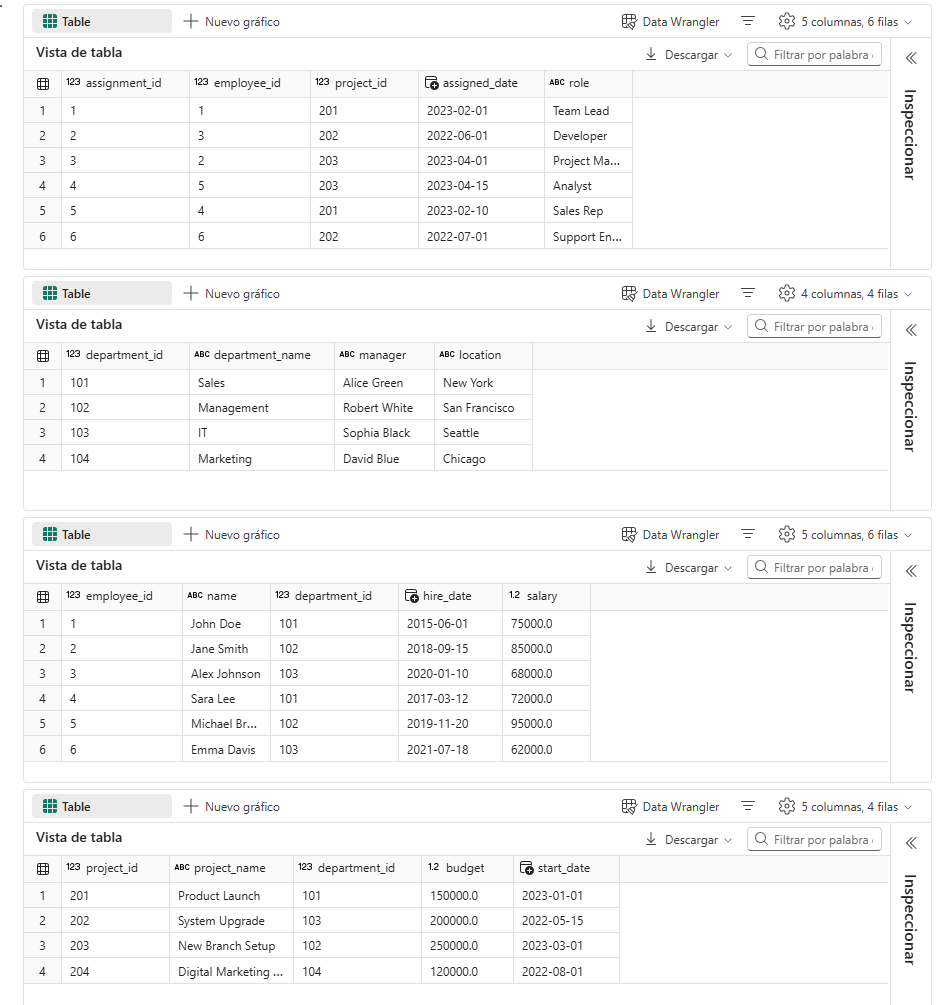

**Filter and select columns and concat**

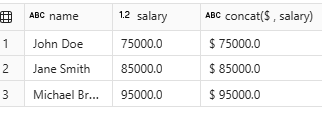

**JOIN**

In [ ]:
import pyspark.sql.functions as F
display(
    employees
    .filter(F.col("salary") >= 75000)
    .select(
        F.col("name"),
        F.col("salary"),
        F.concat(F.lit("$ "), F.col("salary"))
    )
)

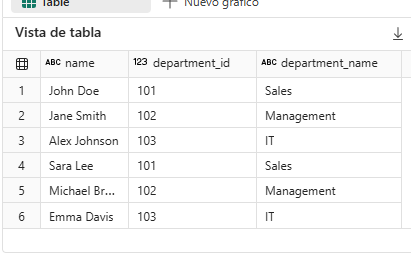

**GROUP BY AND COUNT**

In [ ]:
display(
    employees
    .join(departments, employees["department_id"]== departments["department_id"], "left")
    .groupBy("department_name")
    .count()
    .withColumnRenamed("count","number_of_employees")
)

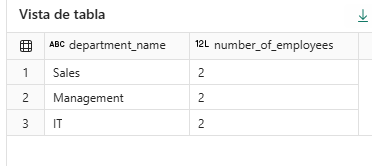

**Quizz**

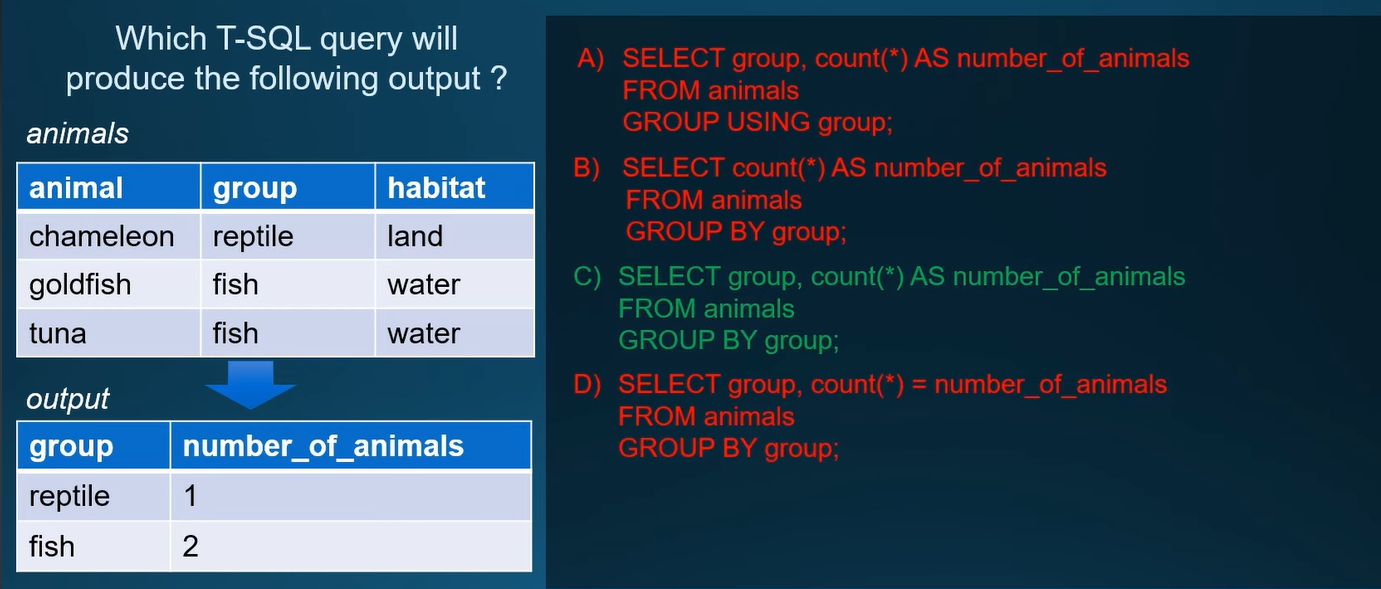

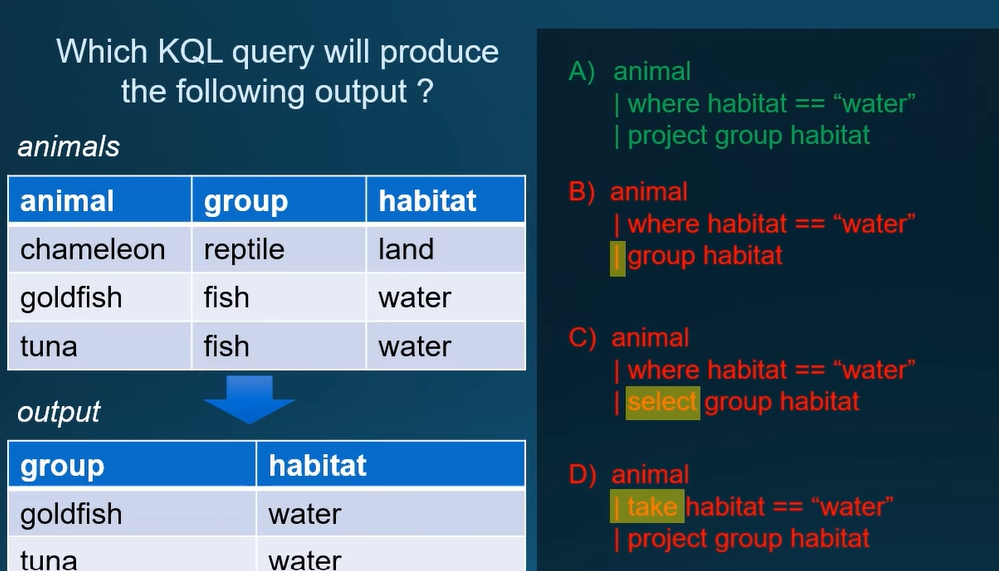

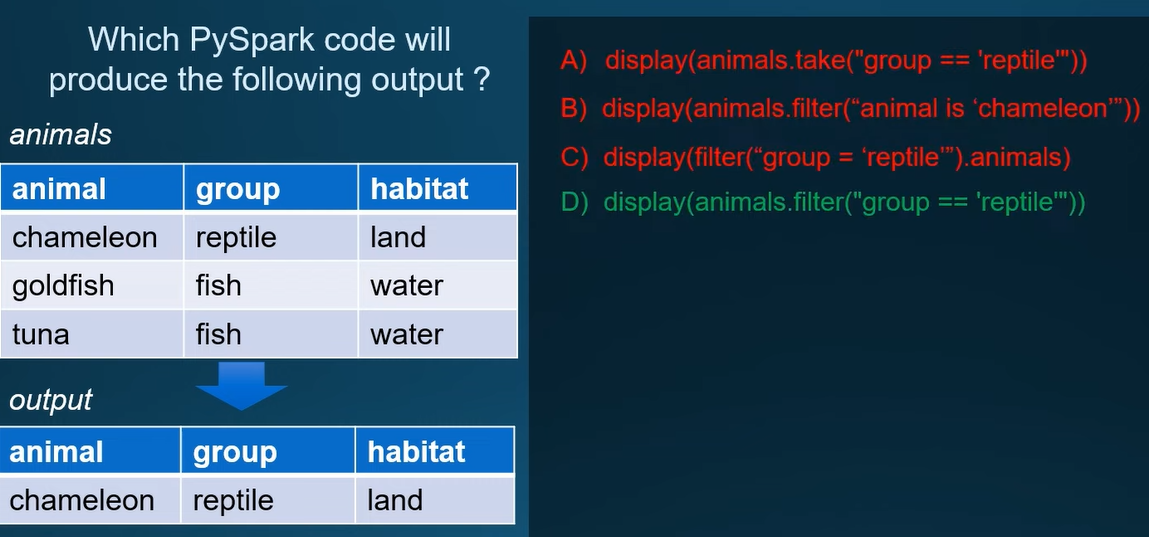

# **NOTEBOOKS IN FABRIC**

## PARAMETERS

One cell can be toggleed as a parameter cell. Define default values as variables

Different types of parameters are supported, string, integer, Float and Boolean

Execution engine adds a new cell beneath the parameter cell with input parameters to overwirite the default values.

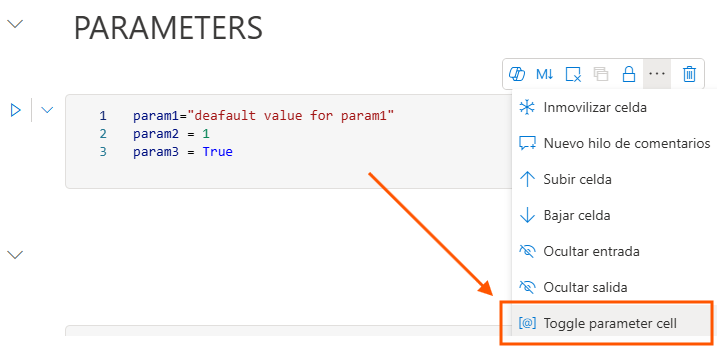

In [ ]:
param1="deafault value for param1"
param2 = 1
param3 = True

## NOTEBOOKUTILS

An integrated package in Microsoft Fabric Notebooks designed to streamline common tasks such as file system operations, enviroment variable access, notebook chaining and secret management.

File System Utilities, (notebookutils.fs) to interact with file systems like ADSL and OneLake. Create directories, move and delete files, etc.

Notebook utilities (notebookutils.notebook), run notebooks, set exit values, create notebooks.


Credential utilities (notebookutils.credentials), get access tokens and manage secrets in an Azure key Vault.

Other utilities: Lakehouse, Session and Runtime

**notebookutils.fs**

In [ ]:
notebookutils.fs.mkdirs("Files/new_folder")
notebookutils.fs.ls("Files/new_folder")
notebookutils.fs.rm("Files/new_folder", True)

**notebookutils.notebook**

In [ ]:
notebookutils.notbook.run("nb_example_1", 90)
notebookutils.notebook.exit("value string")

**notebookutils.credentials**

In [ ]:
notebookutils.credentials.getSecret('https...')

In [ ]:
notebookutils.runtime.context
notebookutils.session.stop()

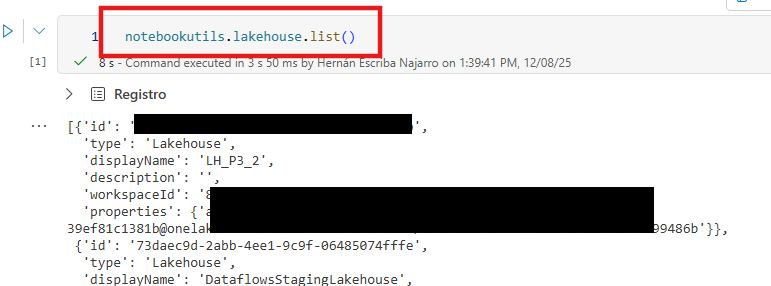

## MAGIC COMMANDS

CELL MAGIC COMMANDS



```
%%sql
%%pyspark
%%spark
%%sparkr
%%bash
```



LINE MAGIC COMMANDS



```
%pip
%run
```



## RUNNING NOTEBOOKS

Run manually, run cell by cell or run the whole notebook.

Run notebooks from notebook, %run magic command or NootbooksUtils library:


```
notebookutils.notebook.run
notebookutils.runMultiple
```



In [ ]:
DAG = {
    "activ...."
}
exit_values_dag = notebookutils.notebook.runMultiple(DAG, {})

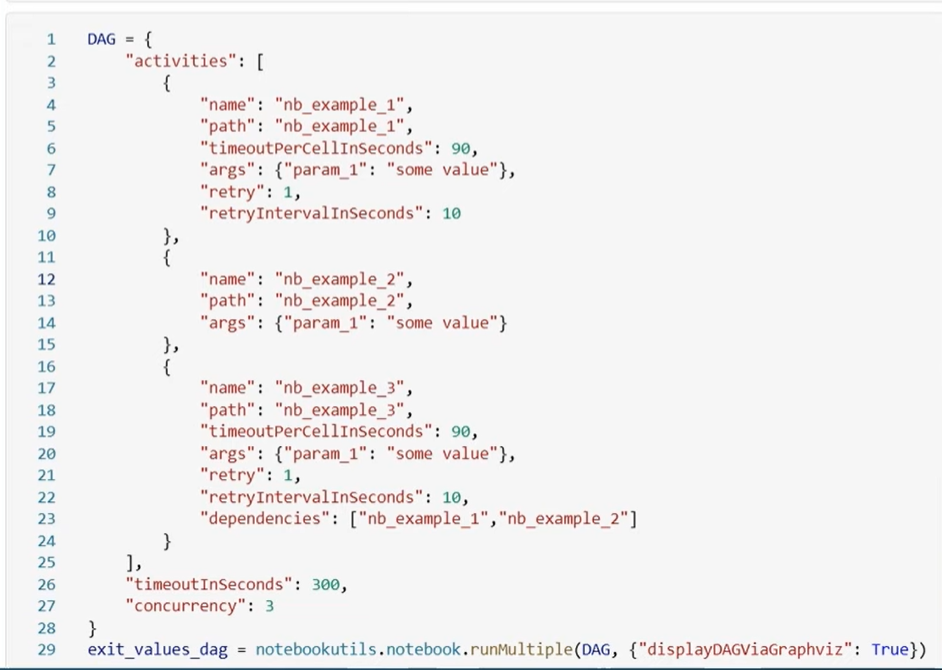

Finally is posible run notebooks with pipelines, also is possible transfer parmeters.

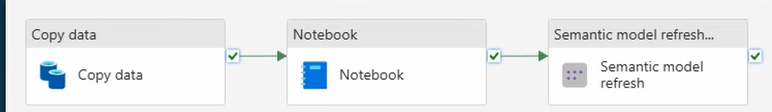

### QUIZZ TIME:

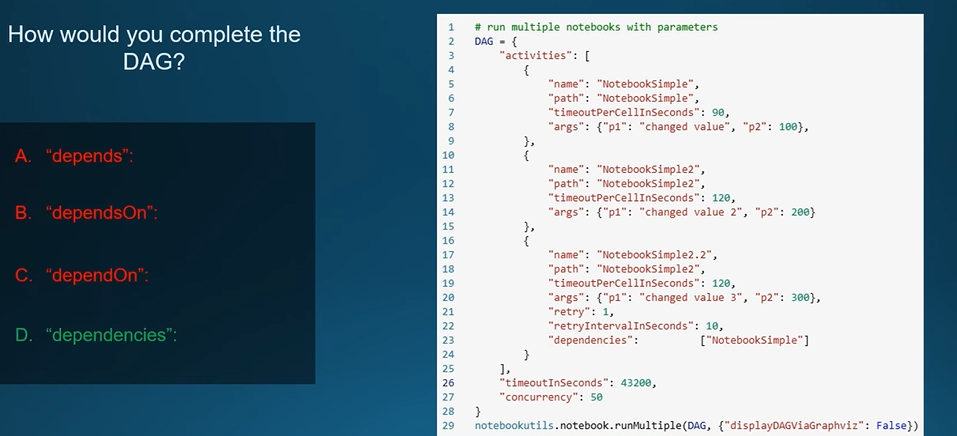

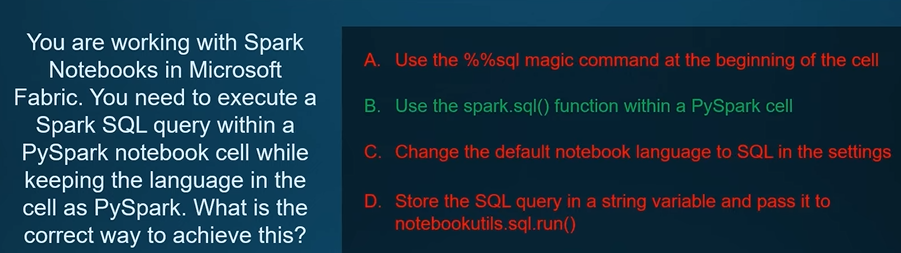